Name: Ashwini Giri. USC ID: 5413882039

# 1. Active Learning Using Support Vector Machine

(a) Download the banknote authentication Data Set from: https://archive.ics. uci.edu/ml/datasets/banknote+authentication. Choose 472 data points ran- domly as the test set. This is a binary classification problem.

The dataset is available on the UCI repository. The data was extracted from images that were taken for the evaluation of an authentication procedure for banknotes.

Attribute Information:

1. variance of Wavelet Transformed image (continuous) 
2. skewness of Wavelet Transformed image (continuous) 
3. curtosis of Wavelet Transformed image (continuous) 
4. entropy of image (continuous) 
5. class (integer) 



The data is present in a text file without the header row, hence appending the header row while reading the data from local machine.

Below are the imports used for the entire problem.

In [51]:
import pandas as pd
import numpy as np
from sklearn.svm import LinearSVC
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV, KFold
import matplotlib.pyplot as plt
%matplotlib inline

In the below code adding the headers while reding the data. The test data is stored in testing_dataframe variable and the train data is stored in training_dataframe. 

In [68]:
data = pd.read_csv("data_banknote_authentication.txt",names=["variance","skewness","curtosis","entropy","class"])
testing_dataframe = data.sample(n=472)
training_dataframe = data.loc[~data.index.isin(testing_dataframe.index)]
training_dataframe.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
2,3.86600,-2.6383,1.9242,0.10645,0
4,0.32924,-4.4552,4.5718,-0.98880,0
5,4.36840,9.6718,-3.9606,-3.16250,0
7,2.09220,-6.8100,8.4636,-0.60216,0


In [69]:
testing_dataframe.head()

,variance,skewness,curtosis,entropy,class
451,5.681000,7.795000,-2.68480,-0.92544,0
1140,-0.530720,-0.097265,-0.21793,1.04260,1
166,1.116600,8.649600,-0.96252,-1.81120,0
747,-0.023579,7.174200,0.78457,-0.75734,0
493,2.808400,11.304500,-3.33940,-4.41940,0


(b) Repeat each of the following two procedures 50 times. You will have 50 errors for 90 SVMs per each procedure.

i. Train a SVM with a pool of 10 randomly selected data points from the training set using linear kernel and L1 penalty. Select the penalty parameter using 10-fold cross validation.1 Repeat this process by adding 10 other randomly selected data points to the pool, until you use all the 900 points. Do NOT replace the samples back into the training set at each step. Calculate the test error for each SVM. You will have 90 SVMs that were trained using 10, 20, 30, ... , 900 data points and their 90 test errors. You have implemented passive learning.

In the below code calculated test error for 90 SVMs and stored it in array avg_error. Averaged errors of each of these 90 SVMs and stored in array error_array. Used 10 fold cross validation for selecting the penalty parameter.

In [18]:
classifier = LinearSVC(penalty='l1',dual=False)
penalty_parameter = {'C':[1,10]}
kf_10 = KFold(n_splits=10)
cross_val = GridSearchCV(classifier,penalty_parameter,cv=kf_10)
avg_err = np.zeros(90)
for n in range(0,50):
    temporary_dataframe = pd.DataFrame()
    concatinated_dataframe=[]
    copied_dataframe = training_dataframe
    error_array=[]
    for i in range(0,90):
        tempdf = copied_dataframe.sample(n=10)
        temporary_dataframe = pd.concat([temporary_dataframe,tempdf])
        concatinated_dataframe.append(temporary_dataframe)
        copied_dataframe = copied_dataframe.loc[~copied_dataframe.index.isin(tempdf.index)]
        x_train=temporary_dataframe.loc[:,:'entropy']
        y_train=temporary_dataframe['class']
        cross_val.fit(x_train,y_train)
        x_test = testing_dataframe.loc[:,:'entropy']
        y_test = testing_dataframe['class']
        accuracy_score = cross_val.score(x_test,y_test)
        error = 1-accuracy_score
        error_array.append(error)
        avg_err[i]+=error

In [73]:
avg_err

array([5.06567797, 2.64618644, 1.82415254, 1.47245763, 1.32627119,
       1.20127119, 1.17584746, 1.04449153, 1.05720339, 1.03389831,
       1.00635593, 0.97033898, 0.8940678 , 0.83050847, 0.82838983,
       0.84110169, 0.85169492, 0.81779661, 0.79237288, 0.7690678 ,
       0.75847458, 0.73728814, 0.71186441, 0.69491525, 0.73305085,
       0.7309322 , 0.7309322 , 0.70762712, 0.70338983, 0.70762712,
       0.71398305, 0.71186441, 0.70974576, 0.72245763, 0.71186441,
       0.69067797, 0.69491525, 0.6779661 , 0.68644068, 0.69279661,
       0.68220339, 0.68644068, 0.66949153, 0.66949153, 0.68432203,
       0.66737288, 0.66525424, 0.65677966, 0.67161017, 0.66737288,
       0.68855932, 0.67584746, 0.6779661 , 0.67584746, 0.6779661 ,
       0.66525424, 0.65677966, 0.65889831, 0.65889831, 0.65677966,
       0.65889831, 0.66949153, 0.65677966, 0.64618644, 0.66101695,
       0.65254237, 0.63983051, 0.63347458, 0.63559322, 0.63983051,
       0.64194915, 0.64194915, 0.65042373, 0.64618644, 0.65254

ii. Train a SVM with a pool of 10 randomly selected data points from the training set using linear kernel and L1 penalty. Select the parameters of the SVM with 10-fold cross validation. Choose the 10 closest data points in the training set to the margin of the SVM2 and add them to the pool. Do not replace the samples back into the training set. Train a new SVM using the pool. Repeat this process until all training data is used. You will have 90 SVMs that were trained using 10, 20, 30,..., 900 data points and their 90 test errors. You have implemented active learning.

In the below code calculated test errors by using the 10 closest data points to the margin of SVM. The support vectors distance is returned by the decision function. These 90 test errors are saved in the array avg_err_active.

In [46]:
classifier_active = LinearSVC(penalty='l1',dual=False)
penalty_parameter_active = {'C':[1,10]}
kf_10_active = KFold(n_splits=10)
cross_val_active = GridSearchCV(classifier_active,penalty_parameter_active,cv=kf_10_active)
avg_err_active = np.zeros(90)
errors_active = []
copied_dataframe_active = []
for n in range(0,50):
    copied_dataframe_active = training_dataframe
    random_dataframe = copied_dataframe_active.sample(n=10) #10 random values
    copied_dataframe_active = copied_dataframe_active.loc[~copied_dataframe_active.index.isin(random_dataframe.index)]
    for i in range(0,90):
        x_train = random_dataframe.loc[:,:'entropy']
        y_train = random_dataframe['class']
        cross_val_active.fit(x_train,y_train) #10
        x_test = testing_dataframe.loc[:,:'entropy']
        y_test = testing_dataframe['class']
        accuracy_score_active = cross_val_active.score(x_test,y_test)
        error = 1-accuracy_score_active
        errors_active.append(error)
        avg_err_active[x]+=error
        if(i==89):
            continue
        support_vector_distance=cross_val_active.decision_function(copied_dataframe_active.loc[:,:'entropy'])
        support_vector_distance = abs(support_vector_distance)
        distance_10_sv = support_vector_distance.argsort()[:10]
        closest_dataframe = copied_dataframe_active.iloc[distance_10_sv,:] #10 closest points to margin
        random_dataframe = pd.concat([random_dataframe,closest_dataframe])
        copied_dataframe_active = copied_dataframe_active.loc[~copied_dataframe_active.index.isin(closest_dataframe.index)]

In [71]:
avg_err_active

array([5.64618644, 2.15677966, 1.40466102, 1.09745763, 0.76059322,
       0.68644068, 0.66737288, 0.64194915, 0.63559322, 0.63559322,
       0.63559322, 0.63559322, 0.63559322, 0.63559322, 0.63559322,
       0.63559322, 0.63559322, 0.63559322, 0.63559322, 0.63559322,
       0.63559322, 0.63559322, 0.63559322, 0.63559322, 0.63559322,
       0.63559322, 0.63559322, 0.63559322, 0.63559322, 0.63559322,
       0.63559322, 0.63559322, 0.63559322, 0.63559322, 0.63559322,
       0.63559322, 0.63559322, 0.63559322, 0.63559322, 0.63559322,
       0.63559322, 0.63559322, 0.63559322, 0.63559322, 0.63559322,
       0.63559322, 0.63559322, 0.63559322, 0.63559322, 0.63559322,
       0.63559322, 0.63559322, 0.63559322, 0.63559322, 0.63559322,
       0.63559322, 0.63559322, 0.63559322, 0.63559322, 0.63559322,
       0.63559322, 0.63559322, 0.63559322, 0.63559322, 0.63559322,
       0.63559322, 0.63559322, 0.63559322, 0.63559322, 0.63559322,
       0.63559322, 0.63559322, 0.63559322, 0.63559322, 0.63559

(c) Average the test errors for the incrementally trained 90 SVMs in 1(b)i and1(b)ii. By doing so, you are performing a Monte Carlo simulation. Plot average test error versus number of training instances for both active and passive learners on the same figure and report your conclusions.

The test errors are plotted for both passive and active learning. The red curve is associated with passive learning whereas the green curve is associated with active learning. Performed Monte Carlo simulation by calculating the average of results of 90 SVMs obtained by iterating the SVMs for 50 times. Based on the curves following 2 conclusions can be drawn:

1. Passive Learning: The average error decreases with increase in the number of training instances.
2. Active Learning: The average error decreases with increase in the number of training instances(increase in number of support vectors in the training instances).

The active training performs better than that of passive training, because the errors are less than that of passive learning.

In [74]:
avg_err[:] = [err/50 for err in avg_err]
avg_err_active[:] = [err_act/50 for err_act in avg_err_active]
iterations= np.arange(1,91,1)

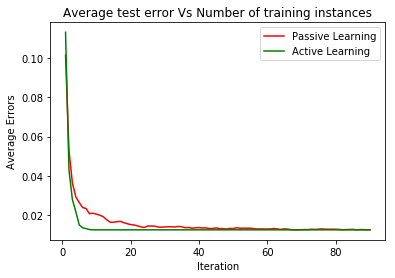

In [75]:
fig,ax = plt.subplots()
ax.plot(iterations,avg_err,label='Passive Learning',color='red')
ax.plot(iterations,avg_err_active,label='Active Learning',color='green')
ax.set(xlabel='Iteration',ylabel='Average Errors',title='Average test error Vs Number of training instances')
legend = ax.legend()
plt.show()